# <font color='green'>[FB-z21mp] Volodymyr Duduladenko </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from wordcloud import WordCloud

from collections import Counter

import re
import string

from nltk.corpus import stopwords

In [2]:
# 200,000+ Jeopardy! Questions
# https://www.kaggle.com/datasets/tunguz/200000-jeopardy-questions

df = pd.read_csv('JEOPARDY_CSV.csv')
df = df[['Category', 'Question']]
df = df[(df.Category == 'SCIENCE') | (df.Category == 'LITERATURE')]
print(df.head)

<bound method NDFrame.head of        Category                                           Question
268     SCIENCE  At sea level at 70 degrees this travels 1,129 ...
274     SCIENCE  The largest tree, the General Sherman in Calif...
280     SCIENCE  (<a href="http://www.j-archive.com/media/2006-...
286     SCIENCE  6 elements once known as inert gases are now k...
292     SCIENCE  (<a href="http://www.j-archive.com/media/2006-...
...         ...                                                ...
216571  SCIENCE  It's the element whose atomic weight is closes...
216577  SCIENCE  Inventors of these include Georges Leclanche, ...
216583  SCIENCE  Life here was the subject of the 1965 book "Wo...
216589  SCIENCE  After 1,400 orbits it fell back to Earth Janua...
216595  SCIENCE  In 1977 the U.S. banned these that used freon ...

[1015 rows x 2 columns]>


In [3]:
Counter(df['Category'])

Counter({'SCIENCE': 519, 'LITERATURE': 496})

In [4]:
# text cleaning function
stop_words = stopwords.words("english")

def clean_text(text):
    text = text.lower()
    text = re.sub("<[^>]*>", "", text)
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)    
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

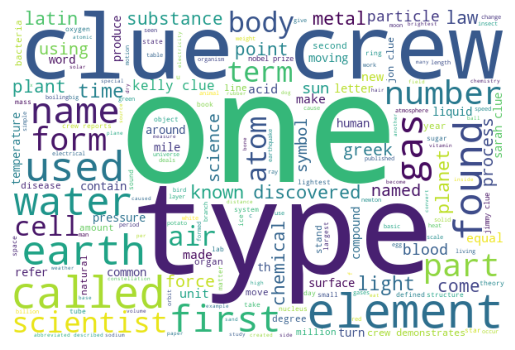

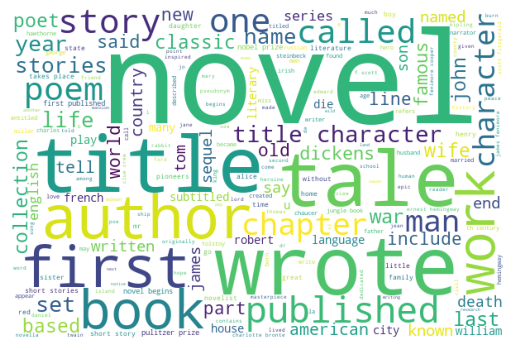

In [5]:
# draw word cloud
def visualize(label):
    text = ''
    for msg in df[df['Category'] == label]['Question']:
        msg = clean_text(msg)
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('SCIENCE')
visualize('LITERATURE')

In [6]:
from sklearn.model_selection import train_test_split

# split data: 80% for train, 20% for test
X = df['Question']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [7]:
# vectorization with TFIDF

tfidf_vectorizer = TfidfVectorizer(max_df=500, min_df=10)

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test =  tfidf_vectorizer.transform(X_test)

# classify with Logistic Regression
lr = LogisticRegression().fit(tfidf_train, y_train)
pred = lr.predict(tfidf_test)

# show metrics
print(confusion_matrix(y_test, pred), "\n")
print(classification_report(y_test, pred), "\n")
print(accuracy_score(y_test, pred))

[[77 20]
 [ 7 99]] 

              precision    recall  f1-score   support

  LITERATURE       0.92      0.79      0.85        97
     SCIENCE       0.83      0.93      0.88       106

    accuracy                           0.87       203
   macro avg       0.87      0.86      0.87       203
weighted avg       0.87      0.87      0.87       203
 

0.8669950738916257
